In [ ]:
API_KEY = ""
MODELS_ENDPOINT = "https://services.clarin-pl.eu/api/v1/oapi/models"
COMPLETIONS_ENDPOINT = "https://services.clarin-pl.eu/api/v1/oapi/chat/completions"
CLARIN_BASE_URL = "https://services.clarin-pl.eu/api/v1/oapi"

In [3]:
import requests
import pandas as pd

In [4]:
def get_models():
    headers = {
        'Authorization': f'Bearer {API_KEY}',  
        'Content-Type': 'application/json'
    }
    response = requests.get(MODELS_ENDPOINT, headers=headers)  
    if response.status_code == 200:
        return response.json() 

In [66]:
def prompt_chat(model_id, prompt):
    url = COMPLETIONS_ENDPOINT
    headers = {"Authorization": f"Bearer {API_KEY}", "Content-Type": "application/json"}
    messages = []
    messages.append({"role": "user", "content": prompt})
    data = {
        "model": model_id,
        "messages": messages
    }
    response = requests.post(url, json=data, headers=headers)
    if response.status_code == 200:
        try:
            data = response.json()
            if isinstance(data, dict) and "choices" in data and data["choices"]:
                return data["choices"][0].get("message", {}).get("content", None)
            else:
                return None  # Handle unexpected response structure
        except (ValueError, TypeError, AttributeError):
            return None  # Handle cases where response.json() is None or not as expected

In [67]:
def prompt_chat_custom_temperature(model_id, prompt, temperature = 0.3):
    url = COMPLETIONS_ENDPOINT
    headers = {"Authorization": f"Bearer {API_KEY}", "Content-Type": "application/json"}
    messages = []
    messages.append({"role": "user", "content": prompt})
    data = {
        "model": model_id,
        "messages": messages,
        "temperature": temperature
        #"max_tokens": max_tokens
    }
    response = requests.post(url, json=data, headers=headers)
    if response.status_code == 200:
        try:
            data = response.json()
            if isinstance(data, dict) and "choices" in data and data["choices"]:
                return data["choices"][0].get("message", {}).get("content", None)
            else:
                return None  # Handle unexpected response structure
        except (ValueError, TypeError, AttributeError):
            return None  # Handle cases where response.json() is None or not as expected

In [5]:
models = get_models()
print(models)

{'data': [{'id': 'bielik', 'full_name': 'speakleash/Bielik-11B-v2.2-Instruct', 'name': 'speakleash/Bielik-11B-v2.2-Instruct', 'type': 'chat'}, {'id': 'cohere', 'full_name': 'CohereForAI/c4ai-command-r-plus', 'name': 'CohereForAI/c4ai-command-r-plus', 'type': 'chat'}, {'id': 'llama3.1', 'full_name': 'meta-llama/Meta-Llama-3.1-70B-Instruct', 'name': 'meta-llama/Meta-Llama-3.1-70B-Instruct', 'type': 'chat'}, {'id': 'llama-guard', 'full_name': 'meta-llama/Llama-Guard-3-8B', 'name': 'meta-llama/Llama-Guard-3-8B', 'type': 'chat'}, {'id': 'llama3.1-8b', 'full_name': 'meta-llama/Llama-3.1-8B-Instruct', 'name': 'meta-llama/Llama-3.1-8B-Instruct', 'type': 'chat'}, {'id': 'openchat', 'full_name': 'openchat/openchat-3.5-1210', 'name': 'openchat/openchat-3.5-1210', 'type': 'chat'}, {'id': 'llama3.3', 'full_name': 'meta-llama/Llama-3.3-70B-Instruct', 'name': 'meta-llama/Llama-3.3-70B-Instruct', 'type': 'chat'}, {'id': 'mixtral-8x22B', 'full_name': 'mistralai/Mixtral-8x22B-Instruct-v0.1', 'name': 'mi

In [6]:
english_data = pd.read_csv("data/en.w3strings.csv", delimiter="|", header=None).iloc[:, 3:]
english_data.columns = ["en_text"]

polish_data = pd.read_csv("data/pl.w3strings.csv", delimiter="|", header=None).iloc[:, 3:]
polish_data.columns = ["pl_text"]

df = pd.concat([english_data, polish_data], axis=1)

In [7]:
df

,en_text,pl_text
0,"Hey, everyone! Wanna hear about Fyresdal?","Ej, ludzie! Chcecie posłuchać o Fyresdal?"
1,"Hey, good folk! Wanna hear what our brave guar...","Ej, ludzie! Chcecie usłyszeć, co nasz dzielny ..."
2,"Shut your trap, dammit!","Stul pysk, do cholery!"
3,Four against one - and you came out alive.,Czterech na jednego. A dałeś radę.
4,Shame to let such a lad waste away behind bars...,"Szkoda, żeby taki chłop marniał za kratkami......"
...,...,...
8376,Farewell.,Bywaj.
8377,Farewell.,Bywaj.
8378,What do you have on offer?,Pokaż mi swoje towary.
8379,Show me what you have in stock.,Pokaż mi swoje towary.


In [8]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kajet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
sentence_1 = nltk.word_tokenize(df['pl_text'][0])
sentence_2 = nltk.word_tokenize("ej, ludzie! Chcecie posłuchać o Fyresdal?")

In [11]:
# Define the reference and hypothesis
reference = [sentence_1]  # Treating sentence_1 as the reference
hypothesis = sentence_2   # Treating sentence_2 as the hypothesis

In [12]:
reference

[['Ej', ',', 'ludzie', '!', 'Chcecie', 'posłuchać', 'o', 'Fyresdal', '?']]

In [13]:
hypothesis

['ej', ',', 'ludzie', '!', 'Chcecie', 'posłuchać', 'o', 'Fyresdal', '?']

In [14]:
bleu_score = sentence_bleu(reference, hypothesis)

In [15]:
bleu_score

0.8633400213704505

In [16]:
models = ["bielik", "llama3.1", "llama3.1-8b"]

In [49]:
scores = []
prompts = []
for english_text, polish_text in zip(df["en_text"].head(10), df["pl_text"].head(10)):
    prompt = prompt_chat('llama3.1', f"Przetłumacz na polski i nie dodawaj niczego więcej: '{english_text}'")
    bleu_score = sentence_bleu([polish_text], prompt)
    scores.append(bleu_score)
    prompts.append(prompt)

d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [50]:
sum(scores) / len (scores)

0.38634308671236706

In [35]:
scores = []
prompts = []
for english_text, polish_text in zip(df["en_text"].head(100), df["pl_text"].head(100)):
    prompt = prompt_chat_custom_temperature('llama3.1', f"Przetłumacz na polski i nie dodawaj niczego więcej: '{english_text}'", 0.0)
    bleu_score = sentence_bleu([polish_text], prompt)
    scores.append(bleu_score)
    prompts.append(prompt)

d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.


In [36]:
sum(scores) / len (scores)

0.45116670415916055

In [44]:
import numpy as np

In [58]:
model_bleu_scores = {}

for model in models:
    scores = []
    for english_text, polish_text in zip(df["en_text"].head(100), df["pl_text"].head(100)):
        prompt = prompt_chat(model, f"Przetłumacz na polski i nie dodawaj niczego więcej: '{english_text}'")
        bleu_score = sentence_bleu([polish_text], prompt)
        scores.append(bleu_score)
    print(sum(scores) / len (scores))
    model_bleu_scores[model] = sum(scores) / len (scores)

d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


0.40316752684369705
0.4014677001894846
0.29393019643971746


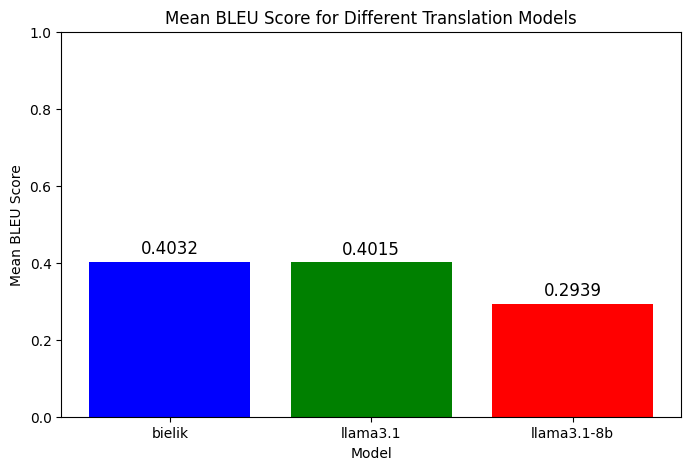

In [ ]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(model_bleu_scores.keys(), model_bleu_scores.values(), color=['blue', 'green', 'red'])

# Labels and title
plt.xlabel("Model")
plt.ylabel("Mean BLEU Score")
plt.title("Mean BLEU Score for Different Translation Models")
plt.ylim(0, 1)  # BLEU scores range from 0 to 1

# Show values on top of bars
for model, score in model_bleu_scores.items():
    plt.text(model, score + 0.02, f"{score:.4f}", ha='center', fontsize=12)

plt.show()


In [61]:
model_bleu_scores = {}

for model in models:
    scores = []
    for english_text, polish_text in zip(df["en_text"].head(100), df["pl_text"].head(100)):
        prompt = prompt_chat_custom_temperature(model, f"Przetłumacz na polski i nie dodawaj niczego więcej: '{english_text}'", 0.0)
        bleu_score = sentence_bleu([polish_text], prompt)
        scores.append(bleu_score)
    print(sum(scores) / len (scores))
    model_bleu_scores[model] = sum(scores) / len (scores)

d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.


0.41542017860627634
0.45116670415916055
0.36845434974871905


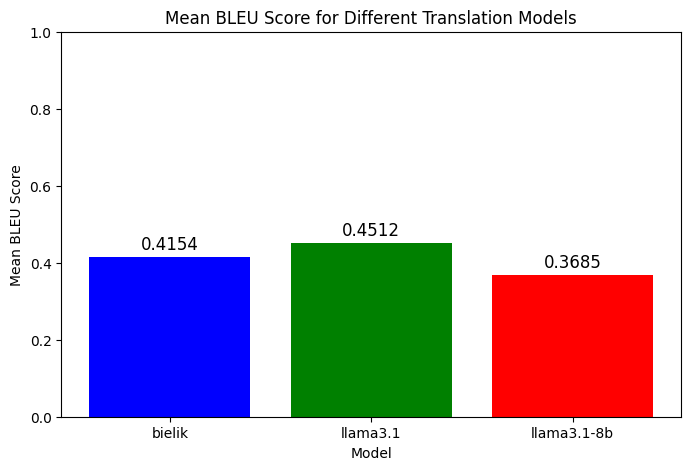

In [62]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(model_bleu_scores.keys(), model_bleu_scores.values(), color=['blue', 'green', 'red'])

# Labels and title
plt.xlabel("Model")
plt.ylabel("Mean BLEU Score")
plt.title("Mean BLEU Score for Different Translation Models")
plt.ylim(0, 1)  # BLEU scores range from 0 to 1

# Show values on top of bars
for model, score in model_bleu_scores.items():
    plt.text(model, score + 0.02, f"{score:.4f}", ha='center', fontsize=12)

plt.show()


d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.


0.2970521360037641
0.3129053850093158
0.23895191963060197


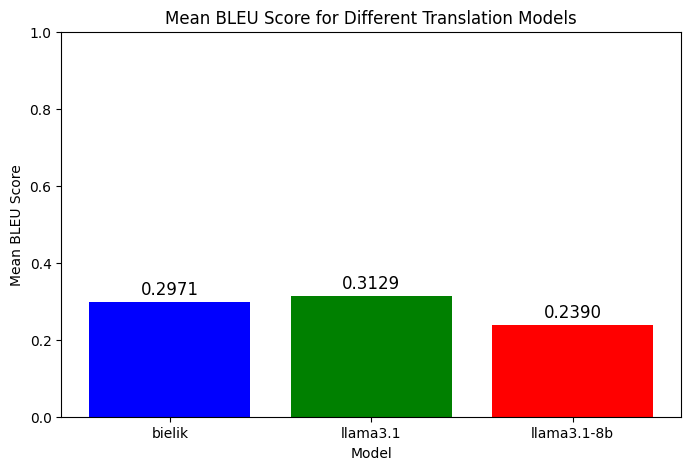

In [68]:
model_bleu_scores = {}
sampled_df = df.sample(n=1000, random_state=42)

for model in models:
    scores = []
    for english_text, polish_text in zip(sampled_df["en_text"], sampled_df["pl_text"]):
        prompt = prompt_chat(model, f"Przetłumacz na polski i nie dodawaj niczego więcej: '{english_text}'")
        if prompt is None:
            continue
        bleu_score = sentence_bleu([polish_text], prompt)
        scores.append(bleu_score)
    print(sum(scores) / len (scores))
    model_bleu_scores[model] = sum(scores) / len (scores)

plt.figure(figsize=(8, 5))
plt.bar(model_bleu_scores.keys(), model_bleu_scores.values(), color=['blue', 'green', 'red'])

# Labels and title
plt.xlabel("Model")
plt.ylabel("Mean BLEU Score")
plt.title("Mean BLEU Score for Different Translation Models")
plt.ylim(0, 1)  # BLEU scores range from 0 to 1

# Show values on top of bars
for model, score in model_bleu_scores.items():
    plt.text(model, score + 0.02, f"{score:.4f}", ha='center', fontsize=12)

plt.show()

d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.


0.3243337386349764
0.343028291629572
0.29068934433354005


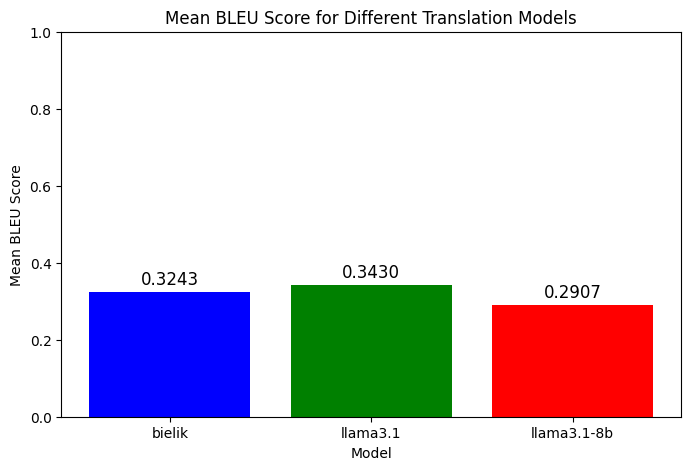

In [69]:
model_bleu_scores = {}
sampled_df = df.sample(n=1000, random_state=42)

for model in models:
    scores = []
    for english_text, polish_text in zip(sampled_df["en_text"], sampled_df["pl_text"]):
        prompt = prompt_chat_custom_temperature(model, f"Przetłumacz na polski i nie dodawaj niczego więcej: '{english_text}'", 0.0)
        if prompt is None:
            continue
        bleu_score = sentence_bleu([polish_text], prompt)
        scores.append(bleu_score)
    print(sum(scores) / len (scores))
    model_bleu_scores[model] = sum(scores) / len (scores)

plt.figure(figsize=(8, 5))
plt.bar(model_bleu_scores.keys(), model_bleu_scores.values(), color=['blue', 'green', 'red'])

# Labels and title
plt.xlabel("Model")
plt.ylabel("Mean BLEU Score")
plt.title("Mean BLEU Score for Different Translation Models")
plt.ylim(0, 1)  # BLEU scores range from 0 to 1

# Show values on top of bars
for model, score in model_bleu_scores.items():
    plt.text(model, score + 0.02, f"{score:.4f}", ha='center', fontsize=12)

plt.show()

d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
d:\Magister\Magisterka\pipeline_prototype\.venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.


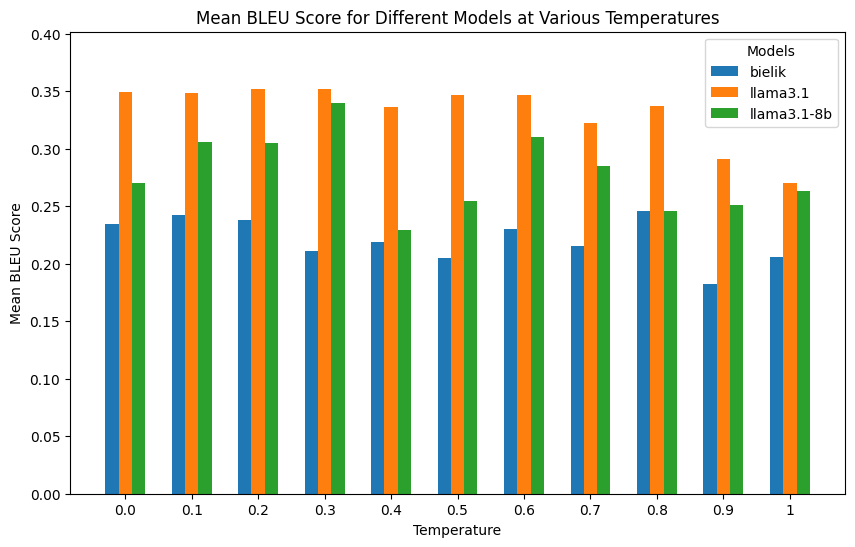

In [88]:
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu

temperatures = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
model_bleu_scores = {temp: {} for temp in temperatures}
sampled_df = df.sample(n=10, random_state=42)

for temp in temperatures:
    for model in models:
        scores = []
        for english_text, polish_text in zip(sampled_df["en_text"], sampled_df["pl_text"]):
            prompt = prompt_chat_custom_temperature(model, 
                f"Przetłumacz na polski i nie dodawaj niczego więcej: '{english_text}'", temp)
            if prompt is None:
                continue
            bleu_score = sentence_bleu([polish_text], prompt)
            scores.append(bleu_score)

        avg_bleu = sum(scores) / len(scores) if scores else 0
        model_bleu_scores[temp][model] = avg_bleu

# Find the maximum BLEU score in data and add a margin
max_bleu = max(max(scores.values(), default=0) for scores in model_bleu_scores.values())
y_max = min(1.0, max_bleu + 0.05)  # Ensure it does not exceed 1.0

plt.figure(figsize=(10, 6))
bar_width = 0.2  # Width of each bar
x_labels = [str(temp) for temp in temperatures]
x_positions = range(len(temperatures))

for i, model in enumerate(models):
    model_scores = [model_bleu_scores[temp].get(model, 0) for temp in temperatures]
    plt.bar(
        [x + i * bar_width for x in x_positions],  # Offset bars for different models
        model_scores,
        width=bar_width,
        label=model
    )

# Labels and title
plt.xlabel("Temperature")
plt.ylabel("Mean BLEU Score")
plt.title("Mean BLEU Score for Different Models at Various Temperatures")
plt.xticks([x + bar_width for x in x_positions], x_labels)  # Adjust x-ticks to align with groups
plt.ylim(0, y_max)  # Dynamically set y-axis limit
plt.legend(title="Models")

plt.show()

In [84]:
prompt_chat_custom_temperature("llama3.1", f"Przetłumacz na polski i nie dodawaj niczego więcej: 'Hey, everyone! Wanna hear about Fyresdal?'", 0.0)

'Cześć wszystkim. Chcecie usłyszeć o Fyresdal?'

In [85]:
prompt_chat_custom_temperature("llama3.1", f"Przetłumacz na polski i nie dodawaj niczego więcej: 'Hey, everyone! Wanna hear about Fyresdal?'", 0.1)

'Cześć wszystkim. Chcecie posłuchać o Fyresdal?'